# Library Usage in Seattle, 2005-2020

## Exploratory Data Analysis

The data that is the basis for this project is the [Checkouts by Title (Physical Items)](https://data.seattle.gov/Community/Checkouts-By-Title-Physical-Items-/5src-czff) dataset from [Seattle Open Data](https://data.seattle.gov/). It was downloaded on December 15, 2020.

This notebook uses two datasets that were created in the [previous notebook](01_data_cleaning.ipynb), which I use to explore and analyze the types of items and the quantities of those items that were checked out from the Seattle Library system between 2005 and 2020.

## Table of contents

1. [Import required packages](#Import-required-packages)
2. [Load data](#Load-data)

### Import required packages

In [51]:
# standard dataframe packages
import pandas as pd
import numpy as np

# graphing packages
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('ticks')

# custom functions
from functions.data_cleaning import *

# reload functions/libraries when edited
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load data

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

I'll load both the complete item checkouts data, as well as the item counts data, here. Again, these were created in the [previous notebook](01_data_cleaning.ipynb).

#### ⏰ Cell below takes ~21.5 minutes to run. ⏰

In [4]:
%%time

# uncomment to load complete item checkouts data
df_full = load_multi_df(
    'data/', 'seattle_lib_', 'pkl', 11, compression='gzip', verbose=2
)

Current time = 18:01:13
-----------------------
Begin load...

Current time = 18:01:24
-----------------------
File 1 loaded successfully.

Current time = 18:01:35
-----------------------
File 2 loaded successfully.

Current time = 18:01:36
-----------------------
Concatenation successful. DataFrame consists of files 1-2.

Current time = 18:01:53
-----------------------
File 3 loaded successfully.

Current time = 18:01:56
-----------------------
Concatenation successful. DataFrame consists of files 1-3.

Current time = 18:02:07
-----------------------
File 4 loaded successfully.

Current time = 18:02:11
-----------------------
Concatenation successful. DataFrame consists of files 1-4.

Current time = 18:02:26
-----------------------
File 5 loaded successfully.

Current time = 18:02:45
-----------------------
Concatenation successful. DataFrame consists of files 1-5.

Current time = 18:03:04
-----------------------
File 6 loaded successfully.

Current time = 18:03:45
-------------------

In [5]:
%%time

# uncomment to load item counts data
df_counts = pd.read_pickle('data/seattle_lib_counts.pkl', compression='gzip')

CPU times: user 11.2 ms, sys: 17.6 ms, total: 28.8 ms
Wall time: 83.4 ms


In [6]:
# take a look
df_full.head()

,title,subjects,date,format_group,format_subgroup,category_group,age_group
0,Firewall,"Kidnapping Drama, Video recordings for the hea...",2008-02-13,Media,Video Disc,Fiction,Adult
1,Marley me,"Comedy films, Married people Drama, Philadelph...",2009-07-03,Media,Video Disc,Fiction,Adult
2,Six feet under The complete fourth season,"Video recordings for the hearing impaired, Pro...",2008-10-26,Media,Video Disc,Fiction,Adult
3,Doctor Who The next doctor,"London England Drama, Doctor Who Fictitious ch...",2010-11-10,Media,Video Disc,Fiction,Adult
4,School ties,"Antisemitism Drama, Video recordings for the h...",2008-12-28,Media,Video Disc,Fiction,Adult


In [7]:
# take a look
df_counts.head()

,total_checkouts,format_group_Media,format_group_Other,format_group_Print,format_subgroup_Art,format_subgroup_Audio Disc,format_subgroup_Audio Tape,format_subgroup_Audiobook Disc,format_subgroup_Audiobook Tape,format_subgroup_Book,...,format_subgroup_Video Tape,category_group_Fiction,category_group_Interlibrary Loan,category_group_Language,category_group_Nonfiction,category_group_Other,category_group_Reference,age_group_Adult,age_group_Juvenile,age_group_Teen
date,,,,,,,,,,,,,,,,,,,,,
2005-04-13,16471,6397.0,33.0,10041.0,0.0,1874.0,63.0,217.0,308.0,9970.0,...,1878.0,8189.0,32.0,370.0,6719.0,1143.0,18.0,11257.0,4613.0,601.0
2005-04-14,10358,4015.0,76.0,6267.0,0.0,1245.0,31.0,164.0,156.0,6225.0,...,1115.0,5276.0,73.0,272.0,4104.0,621.0,12.0,6726.0,3381.0,251.0
2005-04-15,12896,5351.0,51.0,7494.0,0.0,1462.0,54.0,187.0,239.0,7452.0,...,1721.0,6357.0,50.0,302.0,5166.0,1014.0,7.0,8795.0,3747.0,354.0
2005-04-16,1358,552.0,0.0,806.0,0.0,175.0,8.0,31.0,23.0,802.0,...,163.0,567.0,0.0,29.0,666.0,95.0,1.0,950.0,367.0,41.0
2005-04-17,4555,1555.0,8.0,2992.0,0.0,499.0,10.0,47.0,96.0,2946.0,...,480.0,2017.0,8.0,177.0,2145.0,203.0,5.0,3035.0,1349.0,171.0


### Transform values in `format_group` and `category_group`

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [47]:
%%time

# values to convert
convert_values = ['Equipment', 'Electronic']

# custom function to transform
df_full['format_group'] = transform_category(df_full, 'format_group', convert_values, 'Other')

# confirm
df_full.format_group.unique()

CPU times: user 6.86 s, sys: 2.46 s, total: 9.32 s
Wall time: 9.82 s


[Media, Print, Other]
Categories (3, object): [Media, Print, Other]

In [48]:
%%time

# values to convert
convert_values = ['Miscellaneous', 'On Order', 'Temporary', 'WTBBL', 'Periodical']

# custom function to transform
df_full['category_group'] = transform_category(df_full, 'category_group', convert_values, 'Other')

# confirm
df_full.category_group.unique()

CPU times: user 8.6 s, sys: 1.92 s, total: 10.5 s
Wall time: 10.8 s


[Fiction, Nonfiction, Language, Other, Interlibrary Loan, Reference, NaN]
Categories (6, object): [Fiction, Nonfiction, Language, Other, Interlibrary Loan, Reference]

In [49]:
df_full.format_group.value_counts()

Print    59685137
Media    46618209
Other      200497
Name: format_group, dtype: int64

CPU times: user 2.47 s, sys: 1.13 s, total: 3.6 s
Wall time: 3.82 s


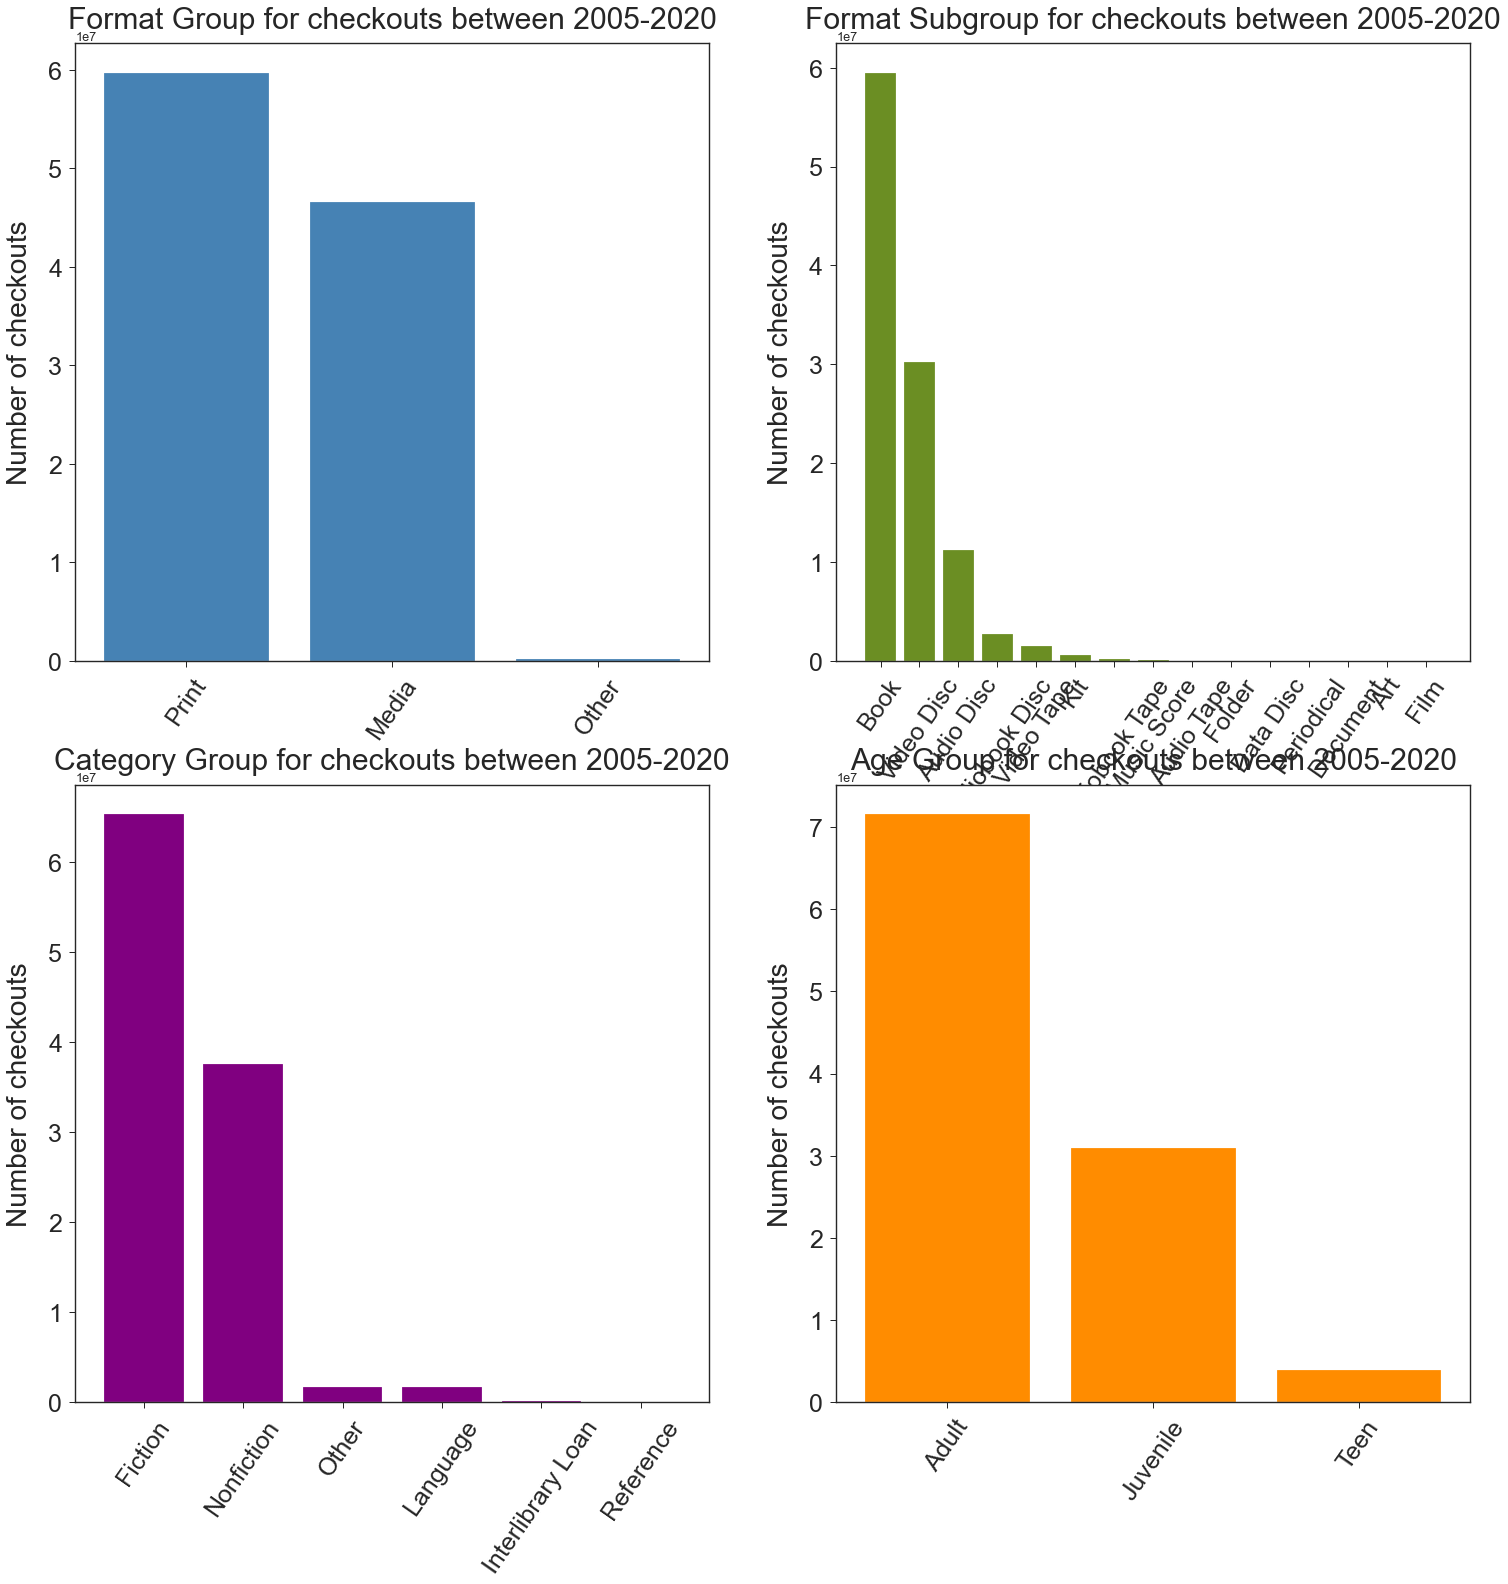

In [53]:
%%time

plt.figure(figsize=(25,25))

cols = ['format_group', 'format_subgroup', 'category_group', 'age_group']

for i, col in enumerate(cols):
    
    # count values in the column
    col_counts = df_full[col].value_counts()

    # set dimension of plots
    nrows = 2
    ncols = 2

    # list of colors
    colors = ['steelblue', 'olivedrab', 'purple', 'darkorange']
    
    # plot
    plt.subplot(nrows, ncols, i+1)
    plt.title(f'{col.title().replace("_", " ")} for checkouts between 2005-2020', 
              fontsize=30, pad=15, x=0.5, y=1)
    plt.ylabel('Number of checkouts', fontsize=28, labelpad=15)
    plt.xticks(rotation=55, fontsize=25)
    plt.yticks(fontsize=25)
    plt.bar(col_counts.index, col_counts.values, color=colors[i])
              
# # uncomment to save
# plt.savefig('charts/top25_words_movement_bar.png', 
#             bbox_inches='tight', transparent=True)

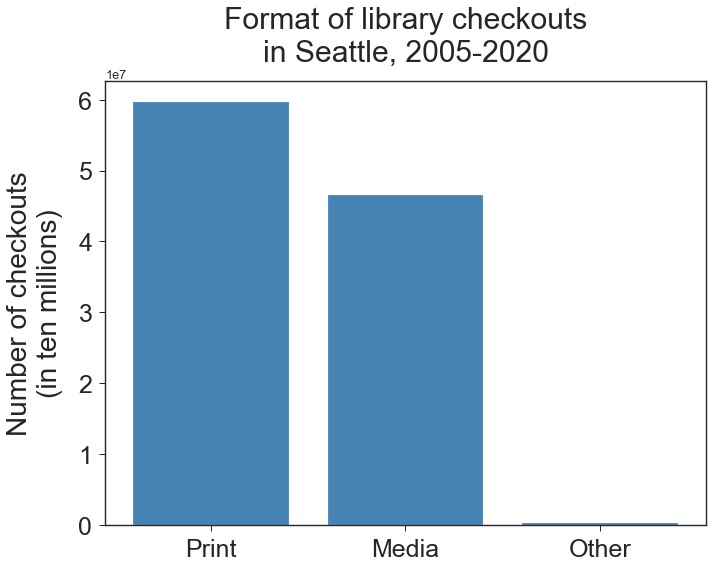

In [94]:
col_counts = df_full['format_group'].value_counts()

# create labels and prettify the plot
plt.figure(figsize=(10,8))
plt.title('Format of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()
# # uncomment to save
# plt.savefig('charts/format_group_counts.png', 
#             bbox_inches='tight', transparent=True)

plt.show()

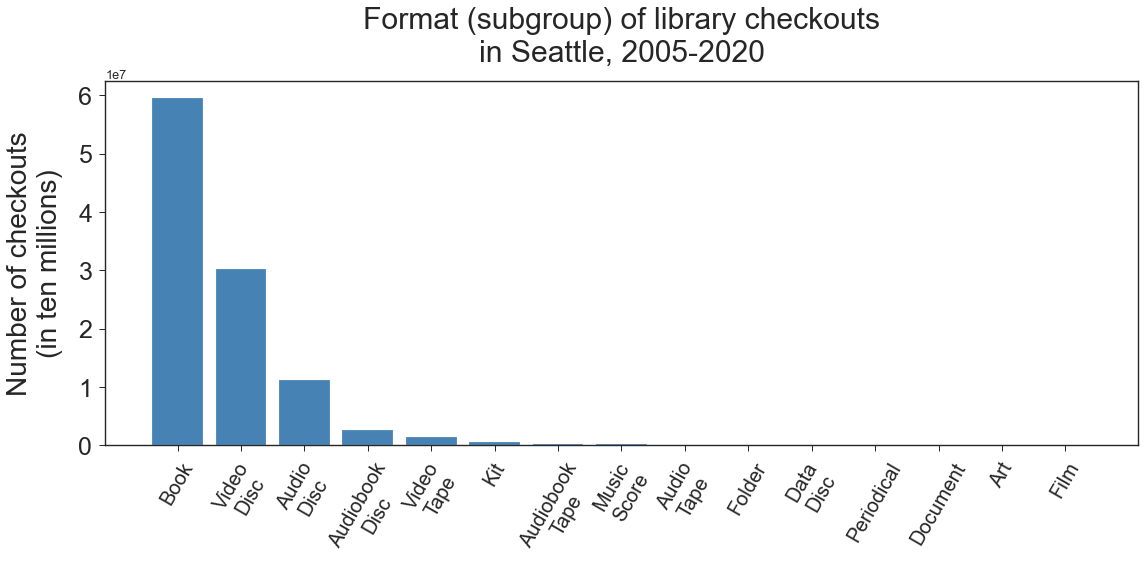

In [95]:
col_counts = df_full['format_subgroup'].value_counts()

# create labels and prettify the plot
plt.figure(figsize=(16,8))
plt.title('Format (subgroup) of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.yticks(fontsize=25)

# prettify the x tick labels
labels_pretty = [label.replace(' ', '\n') for label in list(col_counts.index)]
plt.xticks(ticks=range(len(col_counts)), labels=labels_pretty, fontsize=20, rotation=60)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()
# # uncomment to save
# plt.savefig('charts/format_subgroup_counts.png', 
#             bbox_inches='tight', transparent=True)

plt.show()

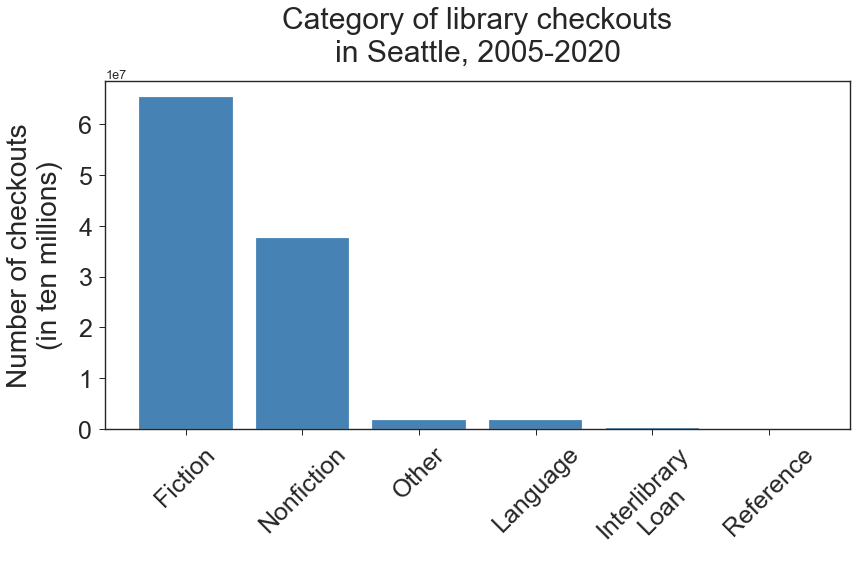

In [96]:
col_counts = df_full['category_group'].value_counts()

# prettify the plot
plt.figure(figsize=(12,8))
plt.title('Category of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
# plt.xlabel('Category', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.yticks(fontsize=25)

# prettify the x tick labels
labels_pretty = [label.replace(' ', '\n') for label in list(col_counts.index)]
plt.xticks(ticks=range(6), labels=labels_pretty, fontsize=25, rotation=45)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()
# # uncomment to save
# plt.savefig('charts/category_group_counts.png', 
#             bbox_inches='tight', transparent=True)

plt.show()

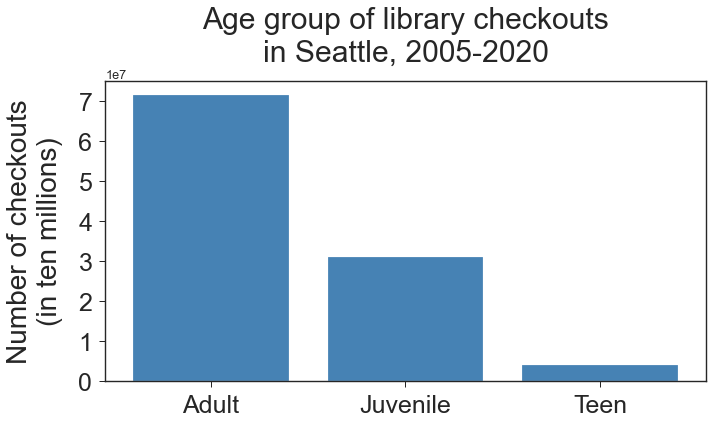

In [97]:
col_counts = df_full['age_group'].value_counts()

# prettify the plot
plt.figure(figsize=(10,6))
plt.title('Age group of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()
# # uncomment to save
# plt.savefig('charts/age_group_counts.png', 
#             bbox_inches='tight', transparent=True)

plt.show()

In [18]:
%%time

df_full[df_full.title == 'Greatest hits'].sort_values('date').head(20)

,title,subjects,date,format_group,format_subgroup,category_group,age_group
36950360,Greatest hits,"Rock music 1971 1980, Rock music 1981 1990, Ro...",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36841964,Greatest hits,"Rock music 1971 1980, Rock music 1961 1970",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36861318,Greatest hits,"Popular music 1951 1960, Popular music 1961 19...",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36931813,Greatest hits,Rock music 1961 1970,2005-04-13,Media,Audio Disc,Nonfiction,Adult
37002937,Greatest hits,"Rock music 1971 1980, Rock music 1981 1990",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36938769,Greatest hits,"Folk music United States, Folk songs English U...",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36793193,Greatest hits,"Contemporary Christian music, Gospel music",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36963817,Greatest hits,"Piano music Jazz, Jazz 1921 1930",2005-04-13,Media,Audio Disc,Nonfiction,Adult
70456703,Greatest hits,"Popular music Ireland 1991 2000, Popular music...",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36956800,Greatest hits,"Rock music 1981 1990, Rock music 1961 1970",2005-04-14,Media,Audio Disc,Nonfiction,Adult


In [19]:
%%time

df_full[df_full.title == 'Greatest hits']['subjects'].unique()

CPU times: user 4.1 s, sys: 44.2 ms, total: 4.15 s
Wall time: 4.14 s


array(['Rock music 1971 1980', 'Rock music',
       'Rock music, Guitar music Rock',
       'Popular music 1971 1980, Popular music 1961 1970',
       'Rockabilly music, Rock music 1981 1990, Rock music 1991 2000',
       'Popular music 1971 1980', 'Popular music 1961 1970',
       'Popular music 1981 1990, Popular music 1991 2000',
       'Funk Music, Rock music 1961 1970, Popular music 1961 1970',
       'Popular music 1991 2000, Popular music 2001 2010',
       'Rock music 1971 1980, Rock music 1961 1970',
       'Rap Music, Popular music 1981 1990, Popular music 1991 2000',
       'Folk rock music, Rock music 1971 1980, Rock music 1961 1970',
       'Rock music 1981 1990, Rock music 1991 2000',
       'Rock music 1991 2000, Popular music 1991 2000',
       'Rock music 1971 1980, Rock music 1981 1990',
       'Rock music 1991 2000, Rock music 2001 2010',
       'Piano music Jazz, Jazz 1961 1970',
       'Rock music 1981 1990, Popular music 1981 1990',
       'Rock music 1971 1980, R

In [27]:
%%time

greatest_hits = df_full[df_full.title == 'Greatest hits']

In [28]:
music_genres = ['gospel', 'soul', 'operas', 'christian', 'reggae', 'humorous', 'orchestral', 
                'childrens', 'jazz', 'folk', 'piano', 'blues', 'country', 'rap', 'rock', 'popular']

In [43]:
%%time

conditions_1 = [
    greatest_hits.subjects.str.lower().str.startswith(genre) for genre in music_genres  
]

conditions_2 = [
    greatest_hits.subjects.str.lower().str.contains(genre) for genre in music_genres 
]

conditions = conditions_1 + conditions_2

choices = [f'{genre} music' for genre in music_genres] * 2

CPU times: user 2.04 s, sys: 207 ms, total: 2.25 s
Wall time: 2.48 s


In [44]:
%%time

greatest_hits['subjects'] = np.select(conditions, choices, 'other')

CPU times: user 15.1 ms, sys: 7.83 ms, total: 22.9 ms
Wall time: 33.5 ms


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
%%time

greatest_hits.subjects.value_counts()

CPU times: user 11.1 ms, sys: 696 µs, total: 11.8 ms
Wall time: 13.1 ms


rock music          41925
popular music       14205
rap music            5070
country music        4603
folk music           2431
jazz music           2197
soul music           1706
piano music           770
blues music           483
gospel music          142
christian music       112
operas music           87
orchestral music       86
childrens music        33
humorous music         33
reggae music           24
Name: subjects, dtype: int64

In [24]:
genre_2 = ['this', 'that', 'hello']

In [26]:
music_genres * 2

['rock',
 'popular',
 'rap',
 'folk',
 'piano',
 'blues',
 'jazz',
 'country',
 'soul',
 'gospel',
 'operas',
 'christian',
 'reggae',
 'humorous',
 'orchestral',
 'childrens',
 'rock',
 'popular',
 'rap',
 'folk',
 'piano',
 'blues',
 'jazz',
 'country',
 'soul',
 'gospel',
 'operas',
 'christian',
 'reggae',
 'humorous',
 'orchestral',
 'childrens']

In [14]:
%%time

df_full[df_full.title == 'Greatest hits']['subjects'].value_counts().head(20)

CPU times: user 4.03 s, sys: 23.1 ms, total: 4.06 s
Wall time: 4.05 s


Rock music                                                                                      10763
Rock music 1971 1980, Rock music 1981 1990                                                       7254
Rock music 1981 1990, Rock music 1991 2000                                                       2753
Popular music 1981 1990, Popular music 1991 2000                                                 2712
Rock music 1991 2000, Rock music 2001 2010                                                       2123
Rock music 1971 1980, Rock music 1961 1970                                                       2042
Rap Music, Popular music 1991 2000                                                               1800
Rap Music                                                                                        1722
Country music 1991 2000, Country music 2001 2010                                                 1639
Rock music 1971 1980, Rock music 1981 1990, Popular music 1981 1990, Popular music

In [15]:
%%time

df_full[df_full.title == 'Greatest hits']['format_group'].value_counts()

CPU times: user 4.05 s, sys: 28.1 ms, total: 4.08 s
Wall time: 4.08 s


Media         73247
Print           660
Other             0
Equipment         0
Electronic        0
Name: format_group, dtype: int64

In [9]:
df_full[df_full.title == 'SPL HotSpot connecting Seattle'].head(10)

,title,subjects,date,format_group,format_subgroup,category_group,age_group
19752051,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-09-01,Print,Book,Nonfiction,Adult
19752202,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-15,Print,Book,Nonfiction,Adult
19752518,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-07-09,Print,Book,Nonfiction,Adult
19752679,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-22,Print,Book,Nonfiction,Adult
19752807,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-11-23,Print,Book,Nonfiction,Adult
19752884,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-12-09,Print,Book,Nonfiction,Adult
19753114,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-10-28,Print,Book,Nonfiction,Adult
19753541,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-12,Print,Book,Nonfiction,Adult
19753614,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-07-17,Print,Book,Nonfiction,Adult
19753933,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-29,Print,Book,Nonfiction,Adult


In [11]:
%%time

df_full[df_full.title == 'SPL HotSpot connecting Seattle'].groupby('date').size().tail(10)

CPU times: user 3.95 s, sys: 24.6 ms, total: 3.97 s
Wall time: 3.97 s


date
2020-12-05    11
2020-12-06     3
2020-12-07     2
2020-12-08    10
2020-12-09     7
2020-12-10    10
2020-12-11     4
2020-12-12    21
2020-12-13     2
2020-12-14     2
dtype: int64

## GRAVEYARD

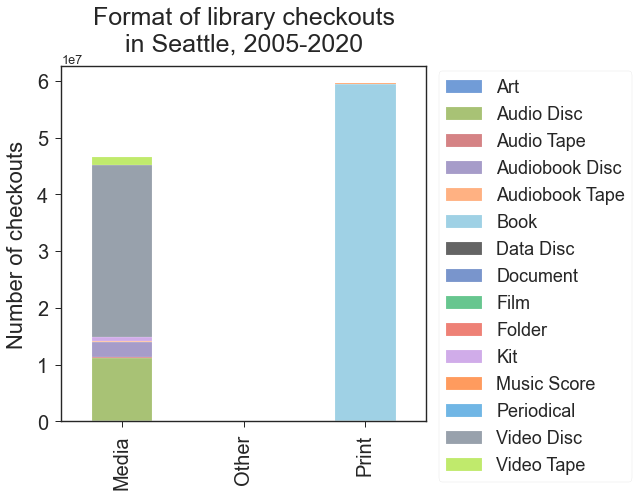

In [103]:
# proportion of end rhymes across movements
format_subgroup_dist = df_full.groupby('format_group').format_subgroup.\
    value_counts().unstack()

# plot the graph
format_subgroup_dist.plot(kind='bar', stacked=True, figsize=(9,7),
#                           color=['darkorange', 'royalblue'], 
                          alpha=.70, fontsize=14)

# prettify the graph
plt.title('Format of library checkouts\nin Seattle, 2005-2020', 
          fontsize=25, pad=15)
plt.suptitle('')
plt.xlabel('')
plt.ylabel('Number of checkouts', 
           fontsize=22, labelpad=10)

# plot the labels and and legends
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.legend(format_subgroup_dist.columns, facecolor='white', 
           framealpha=1, bbox_to_anchor=(1.01, 1.01), 
           fontsize=18)

# prepare to save and display
plt.tight_layout()
# # uncomment to save
# plt.savefig('charts/end_rhymes_stackedbar.png', 
#             bbox_inches='tight', transparent=True)

plt.show()

In [8]:
%%time

df_full.title.value_counts()

CPU times: user 50.1 s, sys: 19.8 s, total: 1min 9s
Wall time: 1min 23s


Greatest hits                                          73907
SPL HotSpot connecting Seattle                         34217
Into the wild                                          25151
Uncataloged Folder or Bag BAL                          22608
Uncataloged Folder or Bag DWN                          22504
                                                       ...  
Kings Garden                                               1
Mental health services in Seattle May 2003                 1
French royal gardens the designs of Andrium                1
Left turn Canada                                           1
adventures of Tintin reporter for Le Petit vingtint        1
Name: title, Length: 881332, dtype: int64